In [1]:
# Imports - these are all the imports needed for the assignment
%matplotlib inline
from scipy import stats
import numpy.ma as ma
from scipy.stats import kstest, normaltest

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1a) Load the nba csv files

# YOUR CODE HERE
df_2004 = pd.read_csv('clean_players_2004.csv')

In [3]:
df_2004

,Unnamed: 0,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,0,243,Aaron McKie,1610612755,PHI,32.0,68,35,33,0.515,...,385,303,4,401,172,323,223,14,5,"243,1610612755"
1,1,1425,Aaron Williams,1610612761,TOR,33.0,42,13,29,0.310,...,380,308,4,421,416,428,223,14,5,"1425,1610612761"
2,2,1502,Adonal Foyle,1610612744,GSW,30.0,78,31,47,0.397,...,307,127,4,306,215,177,129,14,5,"1502,1610612744"
3,3,1559,Adrian Griffin,1610612741,CHI,30.0,69,38,31,0.551,...,403,394,4,402,139,372,223,14,5,"1559,1610612741"
4,4,1733,Al Harrington,1610612737,ATL,25.0,66,10,56,0.152,...,14,7,4,43,464,53,59,14,5,"1733,1610612737"
5,5,2744,Al Jefferson,1610612738,BOS,20.0,71,39,32,0.549,...,144,94,4,221,239,226,129,14,5,"2744,1610612738"
6,6,673,Alan Henderson,1610612742,DAL,32.0,78,55,23,0.705,...,242,262,4,350,355,299,148,14,5,"673,1610612742"
7,7,1893,Aleksandar Radojevic,1610612762,UTA,28.0,12,1,11,0.083,...,199,112,4,429,290,423,223,14,5,"1893,1610612762"
8,8,2682,Alex Garcia,1610612740,NOH,25.0,8,0,8,0.000,...,227,267,4,266,446,283,223,14,5,"2682,1610612740"
9,9,275,Allan Houston,1610612752,NYK,34.0,20,8,12,0.400,...,319,241,4,106,108,194,223,14,5,"275,1610612752"


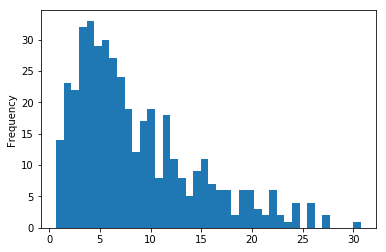

In [4]:
df_2004['PTS'].plot.hist(bins=40)

In [5]:
df_2004.columns[1:]
#pts_2016 = df_2016.as_matrix(columns=df_2016.columns[27:])
#x = pts_2016 #The array needs to be larger than 20, just an example
#mx = ma.masked_array(x)
#z,pval = mstats.normaltest(mx)

#if(pval < 0.055):
#   print("Not normal distribution")

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK',
       'TD3_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')

In [6]:
z,pval = stats.normaltest(df_2004['PTS'])
print(z, pval)
if(pval < 0.05):
    print('PTS Is not from a Normal Dist')
else:
    print('PTS Is likley from a Normal Dist')

size = df_2004['PTS'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2004['PTS'])
stat, kpval = kstest(df_2004['PTS'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Gamma Dist')
else:
    print('PTS Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2004['PTS'])
stat, kpval = kstest(df_2004['PTS'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Log norm Dist')
else:
    print('PTS Is likley from a Log norm Dist')

66.3589636344 3.89344580947e-15
PTS Is not from a Normal Dist
0.0263348560621 0.927307204294
PTS Is likley from a Gamma Dist
0.0380993217437 0.56132788861
PTS Is likley from a Log norm Dist


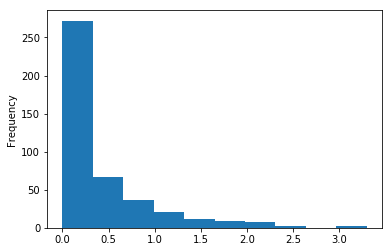

In [7]:
df_2004['BLK'].plot.hist(bins=10)

In [10]:
z,pval = stats.normaltest(df_2004['BLK'])
print(z, pval)
if(pval < 0.05):
    print('BLK Is not from a Normal Dist')
else:
    print('BLK Is likley from a Normal Dist')
    
size = df_2004['BLK'].size
x = scipy.arange(size)
param = stats.expon.fit(df_2004['BLK'])
stat, kpval = kstest(df_2004['BLK'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Exponen Dist')
else:
    print('BLK Is likley from a Exponen Dist')
param = stats.gamma.fit(df_2004['BLK'])
stat, kpval = kstest(df_2004['BLK'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Gamma Dist')
else:
    print('BLK Is likley from a Gamma Dist')
param = stats.lognorm.fit(df_2004['BLK'])
stat, kpval = kstest(df_2004['BLK'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Log norm Dist')
else:
    print('BLK Is likley from a Log norm Dist')
param = stats.chi2.fit(df_2004['BLK'])
stat, kpval = kstest(df_2004['BLK'], 'chi2', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Chisq Dist')
else:
    print('BLK Is likley from a Chisq Dist')


212.690648163 6.52848747321e-47
BLK Is not from a Normal Dist
0.141063190781 6.54475547091e-08
BLK Is not from a Exponen Dist
0.161680721442 2.89018808886e-10
BLK Is not from a Gamma Dist
0.135609366711 2.42283433538e-07
BLK Is not from a Log norm Dist
0.243921350896 0.0
BLK Is not from a Chisq Dist


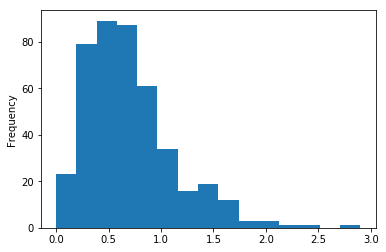

In [11]:
df_2004['STL'].plot.hist(bins=15)

In [14]:
z,pval = stats.normaltest(df_2004['STL'])
print(z, pval)
if(pval < 0.05):
    print('STL Is not from a Normal Dist')
else:
    print('STL Is likley from a Normal Dist')
    
size = df_2004['STL'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2004['STL'])
stat, kpval = kstest(df_2004['STL'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Gamma Dist')
else:
    print('STL Is likley from a Gamma Dist')

param = stats.expon.fit(df_2004['STL'])
stat, kpval = kstest(df_2004['STL'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Exponen Dist')
else:
    print('STL Is likley from a Exponen Dist')

param = stats.lognorm.fit(df_2004['STL'])
stat, kpval = kstest(df_2004['STL'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Log norm Dist')
else:
    print('STL Is likley from a Log norm Dist')
    

95.7909508975 1.5821924379e-21
STL Is not from a Normal Dist
0.059838988342 0.0889324004364
STL Is likley from a Gamma Dist
0.222984598437 0.0
STL Is not from a Exponen Dist
0.0699503050078 0.0286049708933
STL Is not from a Log norm Dist


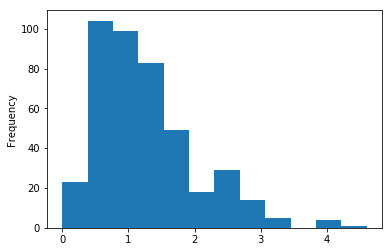

In [15]:
df_2004['TOV'].plot.hist(bins=12)

In [16]:
z,pval = stats.normaltest(df_2004['TOV'])
print(z, pval)
if(pval < 0.05):
    print('TOV Is not from a Normal Dist')
else:
    print('TOV Is likley from a Normal Dist')
    
size = df_2004['TOV'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2004['TOV'])
stat, kpval = kstest(df_2004['TOV'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Gamma Dist')
else:
    print('TOV Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2004['TOV'])
stat, kpval = kstest(df_2004['TOV'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Log norm Dist')
else:
    print('TOV Is likley from a Log norm Dist')

84.5034391076 4.4700393562e-19
TOV Is not from a Normal Dist
0.0553233903864 0.139422251681
TOV Is likley from a Gamma Dist
0.0604835106825 0.083165648207
TOV Is likley from a Log norm Dist


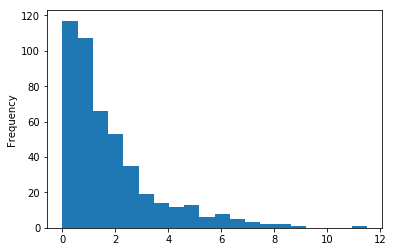

In [13]:
df_2004['AST'].plot.hist(bins=20)

In [17]:
z,pval = stats.normaltest(df_2004['AST'])
print(z, pval)
if(pval < 0.05):
    print('AST Is not from a Normal Dist')
else:
    print('AST Is likley from a Normal Dist')

size = df_2004['AST'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2004['AST'])
stat, kpval = kstest(df_2004['AST'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Gamma Dist')
else:
    print('AST Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2004['AST'])
stat, kpval = kstest(df_2004['AST'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Log norm Dist')
else:
    print('AST Is likley from a Log norm Dist')

157.10325676 7.68176911965e-35
AST Is not from a Normal Dist
0.0466485748474 0.29969654915
AST Is likley from a Gamma Dist
0.0393683739776 0.515478284349
AST Is likley from a Log norm Dist


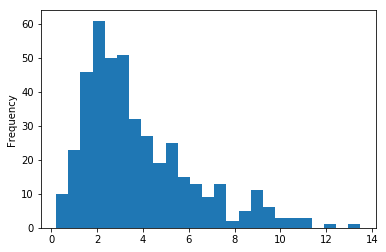

In [18]:
df_2004['REB'].plot.hist(bins=25)

In [19]:
z,pval = stats.normaltest(df_2004['REB'])
print(z, pval)
if(pval < 0.05):
    print('REB Is not from a Normal Dist')
else:
    print('REB Is likley from a Normal Dist')
    
size = df_2004['REB'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2004['REB'])
stat, kpval = kstest(df_2004['REB'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Gamma Dist')
else:
    print('REB Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2004['REB'])
stat, kpval = kstest(df_2004['REB'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Log norm Dist')
else:
    print('REB Is likley from a Log norm Dist')

81.8314678636 1.70028815921e-18
REB Is not from a Normal Dist
0.0658650056916 0.0462058153563
REB Is not from a Gamma Dist
0.0430105311757 0.397490473258
REB Is likley from a Log norm Dist
